# Notebook 5: Pandas DataFrames and analyzing data
*Developed by Johannes Haas and Raoul Collenteur*

In this Notebook we will look into Pandas. Pandas (http://pandas.pydata.org) is the Python data analysis package that can be used for many different tasks you might have in Python. In a previous lecture we already used the Pandas library to read in CSV-files (`pd.read_csv`) and how this function returned a Pandas Series or DataFrame. We have also explored some of the basic statistics available in Pandas. In this lecture we will look a little closer at Pandas, the most common data types and it's powerfull capabilities.

In [4]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [5]:
#Let's import Pandas
import pandas as pd

In [6]:
# Remember this one?
pd.read_csv?

# Data
Before we start let's load some data. In this lecture we will look at some data of the slope of the beach-face and the sediment size. Bujan et al (2018) created a dataset collected from 78 peer-reviewed articles. This dataset is available on Zenodo:

*Bujan, Nans, Cox, Ronadh, & Masselink, Gerd. (2018). From fine sand to boulders: examining the relationship between beach-face slope and sediment size. Dataset and references. [Data set]. Zenodo. http://doi.org/10.5281/zenodo.3241984*

The file contains information contained in different columns. We want to use this dataset to explore the relationship between the size of the sediments and the slope of the beach face. What would be our hypothesis of this relationship?

### 1. Read the data using Pandas read_csv method
First, have a look at the csv file (`Size-Slope-Data-Points.csv`) in any text editor and think about which arguments you probably need to provide to pandas `read_csv` method. 

In [10]:
data = pd.read_csv("data/Size-Slope-Data-Points.csv", decimal=",", sep=";")

In [11]:
# What is the data type?
type(data)

pandas.core.frame.DataFrame

In [12]:
# Print the first XX number of rows
data.head(3)

,Reference,Type,Clast size (mm),Slope (tan),Clast size (),Slope (deg)
0,Bradbury1992,Beach,16.0,0.100,-4.000,5.71
1,Mason1989,Beach,2.6,0.095,-1.379,5.43
2,Mason1989,Beach,2.0,0.055,-1.000,3.15


### 2. Accessing data in Pandas DataFrames
Accessing data in the Pandas dataframe is similar to accessing data in Numpy array, using square brackets (`data[row, column]`). The row has to be a values from the index and the column from the column names. We can use the following attributes of the DataFrame object to know which row/column values we can use:

In [7]:
data.columns
#data.index

Index(['Reference', 'Type', 'Clast size (mm)', 'Slope (tan _)',
       'Clast size (_)', 'Slope (deg)'],
      dtype='object')

In [8]:
#data[row, column]
#data.loc[row, column] # Faster
#data.loc[row, [col, col]] # Multiple columns

### Other ways of accessing data
Sometimes you want to access the index using an integer. For this, Pandas DataFrames have their own method, named iloc (`data.iloc[row, column]`).

In [9]:
#data.iloc[row_id, col_id]

### 3. Slicing data and using basic comparisons
Slicing data is very similar to slicing lists and numpy arrays. The use of basic comparison operators also works similarly and is a powerfull tool to select certain data within a DataFrame

In [10]:
data.iloc[-1:-5:-1]

,Reference,Type,Clast size (mm),Slope (tan _),Clast size (_),Slope (deg)
2143,Brayne2015,Beach,70.00,0.123,-6.129,7.01
2142,Brayne2015,Beach,140.00,0.270,-7.129,15.11
2141,Komar1998,Beach,0.17,0.011,2.556,0.64
2140,Komar1998,Beach,0.19,0.011,2.395,0.63


In [11]:
data.loc[data["Reference"] == "Komar1998"]

,Reference,Type,Clast size (mm),Slope (tan _),Clast size (_),Slope (deg)
2057,Komar1998,Beach,0.56,0.242,0.840,13.60
2058,Komar1998,Beach,0.56,0.209,0.840,11.80
2059,Komar1998,Beach,0.56,0.200,0.836,11.31
2060,Komar1998,Beach,0.48,0.199,1.059,11.25
2061,Komar1998,Beach,0.44,0.189,1.192,10.68
2062,Komar1998,Beach,0.54,0.181,0.902,10.23
2063,Komar1998,Beach,0.56,0.180,0.830,10.20
2064,Komar1998,Beach,0.81,0.204,0.297,11.54
2065,Komar1998,Beach,0.79,0.182,0.342,10.29
2066,Komar1998,Beach,0.75,0.159,0.422,9.05


### Inclass-Exercise: Select data from the DataFrame
Select all "slope (deg)" values higher than 10.0 for the Reference "Brayne2015". 

In [15]:
data.loc[(data["Reference"] == "Komar1998") & (data["Slope (deg)"] > 10.0)]

,Reference,Type,Clast size (mm),Slope (tan),Clast size (),Slope (deg)
2057,Komar1998,Beach,0.56,0.242,0.840,13.60
2058,Komar1998,Beach,0.56,0.209,0.840,11.80
2059,Komar1998,Beach,0.56,0.200,0.836,11.31
2060,Komar1998,Beach,0.48,0.199,1.059,11.25
2061,Komar1998,Beach,0.44,0.189,1.192,10.68
2062,Komar1998,Beach,0.54,0.181,0.902,10.23
2063,Komar1998,Beach,0.56,0.180,0.830,10.20
2064,Komar1998,Beach,0.81,0.204,0.297,11.54
2065,Komar1998,Beach,0.79,0.182,0.342,10.29


### Plotting data of Pandas DataFrames

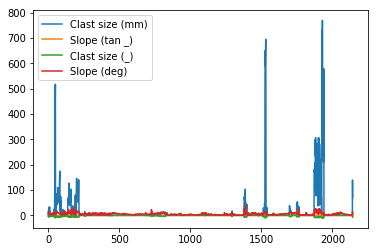

In [12]:
data.plot()
#data.plot(subplots=True)

In [13]:
#data.plot.scatter()

### Statistics in Pandas DataFrames

In [14]:
data.describe()

,Clast size (mm),Slope (tan _),Clast size (_),Slope (deg)
count,2144.000000,2144.000000,2144.000000,2144.000000
mean,15.696101,0.102103,0.165686,5.786889
std,66.560902,0.073443,2.724730,4.032175
min,0.070000,0.008000,-9.589000,0.460000
25%,0.270000,0.049750,-0.284000,2.830000
50%,0.430000,0.090000,1.228000,5.140000
75%,1.220000,0.135000,1.869250,7.672500
max,770.150000,0.830000,3.855000,39.690000


In [15]:
data.corr()

,Clast size (mm),Slope (tan _),Clast size (_),Slope (deg)
Clast size (mm),1.000000,0.351854,-0.652932,0.352924
Slope (tan _),0.351854,1.000000,-0.685843,0.998991
Clast size (_),-0.652932,-0.685843,1.000000,-0.691446
Slope (deg),0.352924,0.998991,-0.691446,1.000000


In [16]:
data.loc[:, "Slope (deg)"].sum()

12407.09

In [17]:
#data.min()
#data.std()
#data.max()

### Pandas Time Series functionality
One of the coolest features of Pandas are it's time series capabilities. When the index is a collection of datetimes, we can look at the data as time series and use the built-in functionality for this. First, let's create some random data to play with.

In [18]:
# Let's create some random data to play with
index = pd.date_range(start="2000-01-01", end="2009-12-31")
values = 1 + np.sqrt(0.01 * np.arange(len(index))) + np.random.rand(len(index))
ts = pd.Series(values, index)

print("The type of variable ts is:", type(ts))

ts.head()

The type of variable ts is: <class 'pandas.core.series.Series'>


2000-01-01    1.188393
2000-01-02    1.639978
2000-01-03    1.193347
2000-01-04    1.418896
2000-01-05    2.068275
Freq: D, dtype: float64

In [19]:
# Let's look at the index, which is a DateTimeIndex
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=3653, freq='D')

### Time series
Pandas will recognize the fact that `ts` is a time series. When you plot the time series, date time indices will be used as axis labels.

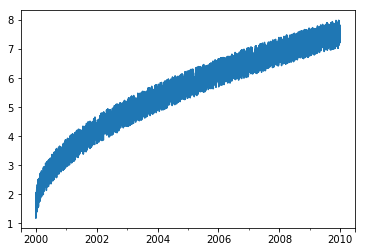

In [20]:
ts.plot()

In [21]:
# Indexing time series is easy
ts.loc["2000"].max()

#ts.loc["2000": "2005-06-01"]

3.880088982288575

### In-class exercise
Calculate the average values for each year and plot it as red dots on top of the actual data.

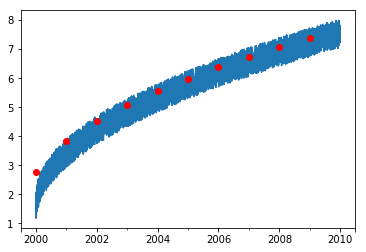

In [22]:
ts.plot()
ts.resample("A").mean().plot(marker="o", c="r", linestyle=" ")

### Writing .xls and .csv files with pandas
Storing the results of your analysis can be a very important way to communicate with your future employers. CSV-files and Excel-files are common file formats to do this and can easily be sent through email. Pandas has methods for different file-formats. All start with `data.to_format`, e.g., `data.to_csv` or `data.to_excel`.


In [23]:
#data.to_csv("test_data.csv")
#data.to_excel("test_data.xlsx")

### Inclass-Exercise: Let's look at the actual data!
That's it for the introduction to Pandas. Now, let us use what we have learned to study the relationship between the beach-face slope and the sediment size (clast size). Perform the following steps:

1. Define a hypothesis (What do you expect is the relationship?)
2. Choose two variables you think are usefull to test the hypothesis 
3. Create a scatter plot of these two variables
4. Calculate the correlation between these two variables
5. Draw a conclusion 


The hypothesis is that the beach-face slope is larger when the sediment size is larger


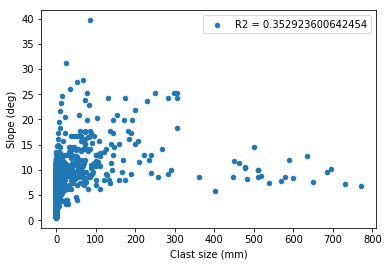

In [27]:
print("The hypothesis is that the beach-face slope is larger when the sediment size is larger")

data.plot.scatter(x="Clast size (mm)", y="Slope (deg)")

r = data.loc[:, ["Clast size (mm)", "Slope (deg)"]].corr().iloc[0,1]
plt.legend(["R2 = " + str(r)])